# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [3]:
df = pd.read_csv(r'/content/cleaned_twitter_disaster.csv')

In [4]:
df.head()

,id,keyword,location,text,target,char_length,word_length,cleaned_text,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,our deeds are the reason of this earthquake ma...,"['our', 'deeds', 'are', 'the', 'reason', 'of',..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,forest fire near la ronge sask canada,"['forest', 'fire', 'near', 'la', 'ronge', 'sas..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,all residents asked to shelter in place are be...,"['all', 'residents', 'asked', 'to', 'shelter',..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,13000 people receive wildfires evacuation orde...,"['13000', 'people', 'receive', 'wildfires', 'e..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,just got sent this photo from ruby alaska as s...,"['just', 'got', 'sent', 'this', 'photo', 'from..."


In [5]:
df.shape

(7613, 9)

In [6]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'char_length',
       'word_length', 'cleaned_text', 'tokens'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            7613 non-null   int64 
 1   keyword       7552 non-null   object
 2   location      5080 non-null   object
 3   text          7613 non-null   object
 4   target        7613 non-null   int64 
 5   char_length   7613 non-null   int64 
 6   word_length   7613 non-null   int64 
 7   cleaned_text  7613 non-null   object
 8   tokens        7613 non-null   object
dtypes: int64(4), object(5)
memory usage: 535.4+ KB


In [8]:
df.describe()

,id,target,char_length,word_length
count,7613.000000,7613.00000,7613.000000,7613.000000
mean,5441.934848,0.42966,101.037436,14.903586
std,3137.116090,0.49506,33.781325,5.732604
min,1.000000,0.00000,7.000000,1.000000
25%,2734.000000,0.00000,78.000000,11.000000
50%,5408.000000,0.00000,107.000000,15.000000
75%,8146.000000,1.00000,133.000000,19.000000
max,10873.000000,1.00000,157.000000,31.000000


# Feature Engineering

## 2.1. Basic Textual Features

### Word Frequencies (Bag of Words):

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(df['cleaned_text'])

In [10]:
X_bow

<7613x15738 sparse matrix of type '<class 'numpy.int64'>'
	with 94346 stored elements in Compressed Sparse Row format>

### TF-IDF (Term Frequency-Inverse Document Frequency):

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [12]:
X_tfidf

<7613x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 82213 stored elements in Compressed Sparse Row format>

## 2.2. BERT or Other Transformer Embeddings:

In [ ]:
!pip3 install transformers

In [13]:
from transformers import BertTokenizer, BertModel
#import torch
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertModel.from_pretrained('bert-base-uncased')
#def get_bert_embedding(text):
#    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
#    outputs = model(**inputs)
#    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

#df['bert_embedding'] = df['cleaned_text'].apply(get_bert_embedding)

In [14]:
df.head(5)

,id,keyword,location,text,target,char_length,word_length,cleaned_text,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,our deeds are the reason of this earthquake ma...,"['our', 'deeds', 'are', 'the', 'reason', 'of',..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,forest fire near la ronge sask canada,"['forest', 'fire', 'near', 'la', 'ronge', 'sas..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,all residents asked to shelter in place are be...,"['all', 'residents', 'asked', 'to', 'shelter',..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,13000 people receive wildfires evacuation orde...,"['13000', 'people', 'receive', 'wildfires', 'e..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,just got sent this photo from ruby alaska as s...,"['just', 'got', 'sent', 'this', 'photo', 'from..."


## 2.3 Sentiment Analysis:

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [16]:
df.head(5)

,id,keyword,location,text,target,char_length,word_length,cleaned_text,tokens,sentiment
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,our deeds are the reason of this earthquake ma...,"['our', 'deeds', 'are', 'the', 'reason', 'of',...",0.2732
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,forest fire near la ronge sask canada,"['forest', 'fire', 'near', 'la', 'ronge', 'sas...",-0.3400
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,all residents asked to shelter in place are be...,"['all', 'residents', 'asked', 'to', 'shelter',...",-0.2960
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,13000 people receive wildfires evacuation orde...,"['13000', 'people', 'receive', 'wildfires', 'e...",0.0000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,just got sent this photo from ruby alaska as s...,"['just', 'got', 'sent', 'this', 'photo', 'from...",0.0000


## 2.4- Additional Features: Hashtags, Mentions

In [17]:
# Function to calculate additional features
def extract_additional_features(text):
    num_hashtags = len(re.findall(r"#\w+", text))
    num_mentions = len(re.findall(r"@\w+", text))
    return pd.Series([num_hashtags, num_mentions], index=['num_hashtags', 'num_mentions'])

In [18]:
# Apply function to both training and test sets
additional_future = df['text'].apply(extract_additional_features)
additional_future

,num_hashtags,num_mentions
0,1,0
1,0,0
2,0,0
3,1,0
4,2,0
...,...,...
7608,0,0
7609,0,2
7610,0,0
7611,0,0


## 2.3. Combining Features

In [19]:
from scipy.sparse import hstack
import numpy as np

In [21]:
# Combine BoW/TF-IDF with other features
X_combined = hstack([X_tfidf,additional_future, np.array(df[['char_length','sentiment']])])

In [22]:
X_combined

<7613x5004 sparse matrix of type '<class 'numpy.float64'>'
	with 99342 stored elements in COOrdinate format>

## Split the dataset

In [23]:
from sklearn.model_selection import train_test_split

X = X_combined
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2.5- Train Models and Evaluate Performance

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

### 1. Logistic Regression

In [25]:
from sklearn.metrics import classification_report

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_log = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       874
           1       0.79      0.69      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



### 2. Random Forest

In [26]:
random_model = RandomForestClassifier()
random_model.fit(X_train, y_train)
y_pred_ran = random_model.predict(X_test)
print(classification_report(y_test, y_pred_ran))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       874
           1       0.85      0.60      0.71       649

    accuracy                           0.78      1523
   macro avg       0.80      0.76      0.77      1523
weighted avg       0.80      0.78      0.78      1523



### 3. neural network model

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [29]:
model_neural = Sequential()
model_neural.add(Dense(units=64, activation='relu'))
model_neural.add(Dense(units=32, activation='relu'))
model_neural.add(Dense(units=16, activation='relu'))
model_neural.add(Dense(units=1, activation='sigmoid'))

model_neural.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model_neural.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5687 - loss: 0.6972
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7553 - loss: 0.5632
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8389 - loss: 0.3986
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8658 - loss: 0.3234
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8919 - loss: 0.2767
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8937 - loss: 0.2576
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9063 - loss: 0.2312
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9203 - loss: 0.2002
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9314 - loss: 0.1776
Epoch 10/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9176 - loss: 0.2051
Epoch 11/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9424 - loss: 0.1595
Epoch 12/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3

In [30]:
# 6. Evaluate the model
test_loss, test_accuracy = model_neural.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7231 - loss: 2.0787
Test accuracy: 0.74


## 2.6- Hyperparameter Tuning Using Grid Search

### 1. Logistic Regression Hyperparameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV
logistic_model = LogisticRegression()
# Set up the parameter grid for Grid Search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}
# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [34]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [35]:
# Get the best model after tuning
best_logistic_model = grid_search.best_estimator_

In [36]:
# Make predictions with the best model
y_pred_log = best_logistic_model.predict(X_test)

In [37]:
# Print classification report
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred_log))

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.83      0.70      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



### 2. Random Forest Hyperparameter Tuning

In [38]:
# Define the model
random_model = RandomForestClassifier(random_state=42)
# Set up the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
# Set up GridSearchCV with cross-validation
grid_search_ran = GridSearchCV(random_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
# Fit the grid search to the data
grid_search_ran.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [ ]:
# Get the best model after tuning
best_random_model = grid_search_ran.best_estimator_

In [ ]:
# Make predictions with the best model
y_pred_ran = best_random_model.predict(X_test)

In [ ]:
# Print classification report
print("Best Parameters:", grid_search_ran.best_params_)
print(classification_report(y_test, y_pred_ran))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       874
           1       0.85      0.63      0.73       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.78      1523
weighted avg       0.81      0.80      0.79      1523



### 3. neural network model Hyperparameter Tuning

In [ ]:
def create_model():
    model_neural_tue = Sequential()
    model_neural_tue.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model_neural_tue.add(Dense(1))  # Single output for regression
    model_neural_tue.compile(optimizer='adam', loss='mse')
    return model_neural_tue

In [ ]:
from scikeras.wrappers import KerasRegressor
model_neural_tue = KerasRegressor(model=create_model, epochs=10, batch_size=10, verbose=0)
param_grid = {
    'batch_size': [10, 20, 40],
    'epochs': [10, 20, 50]
}

In [ ]:
# Initialize RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_neural_tue, param_distributions=param_grid, n_iter=10, error_score='raise')

In [ ]:
# Perform the random search
random_result = random_search.fit(X_train, y_train)

In [ ]:
accuracy = random_result.score(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.3158


## 2.7- Save the Best Model

In [ ]:
import pickle
pickle.dump(best_logistic_model,open('regression_model.pkl','wb'))
print(type(best_logistic_model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


# Part 3: Model Evaluation and Validation

## 3.1- Confusion Matrix

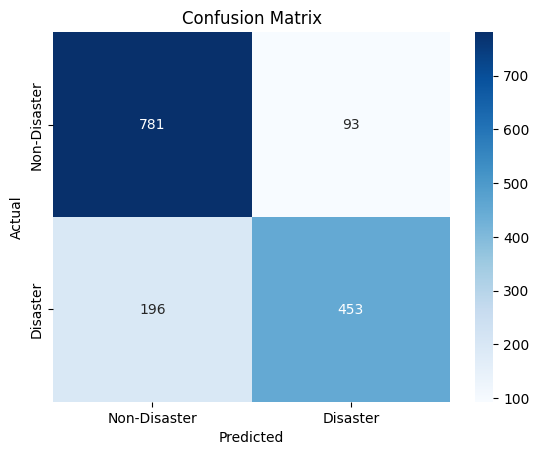

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 3.2- ROC Curve and AUC (Area Under the Curve)

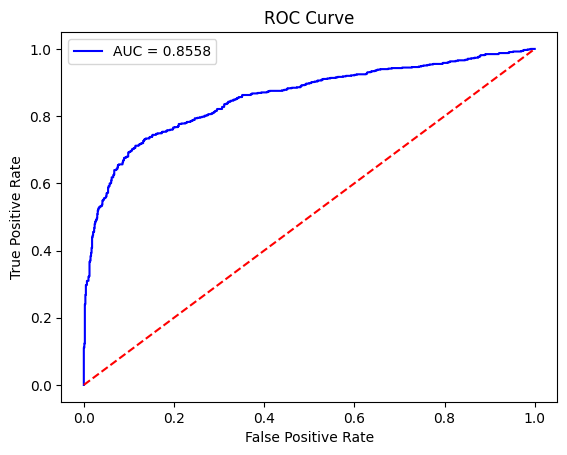

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = best_logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 3.3- Precision-Recall Curve

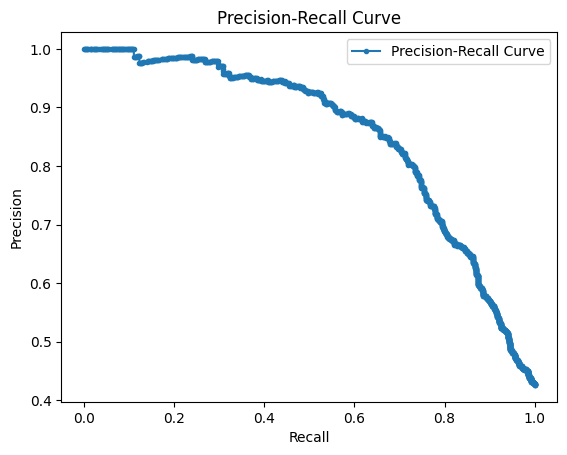

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, marker='.', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()